# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data

training_file = ('traffic-signs-data/train.p')
testing_file = ('traffic-signs-data/test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import numpy as np
#Counting unique classes and their frequency#
train_class, train_class_samples = np.unique(y_train, return_counts=True)
test_class, test_class_samples = np.unique(y_test,return_counts=True)

pos = []
#Find position of unique class##
for i in train_class:
    pos.append(y_train.tolist().index(i))

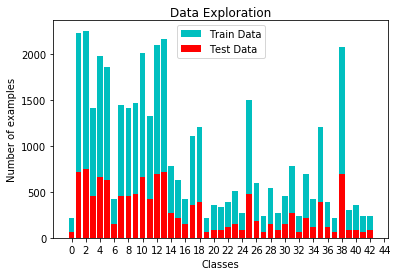

In [4]:
## Data exploration visualization goes here.
## Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.bar(train_class,train_class_samples,label='Train Data',color='c')
plt.bar(test_class,test_class_samples,label='Test Data',color='r')
plt.xticks(range(0,45,2))
plt.xlabel('Classes')
plt.ylabel('Number of examples')
plt.legend()
plt.title('Data Exploration')
plt.show()

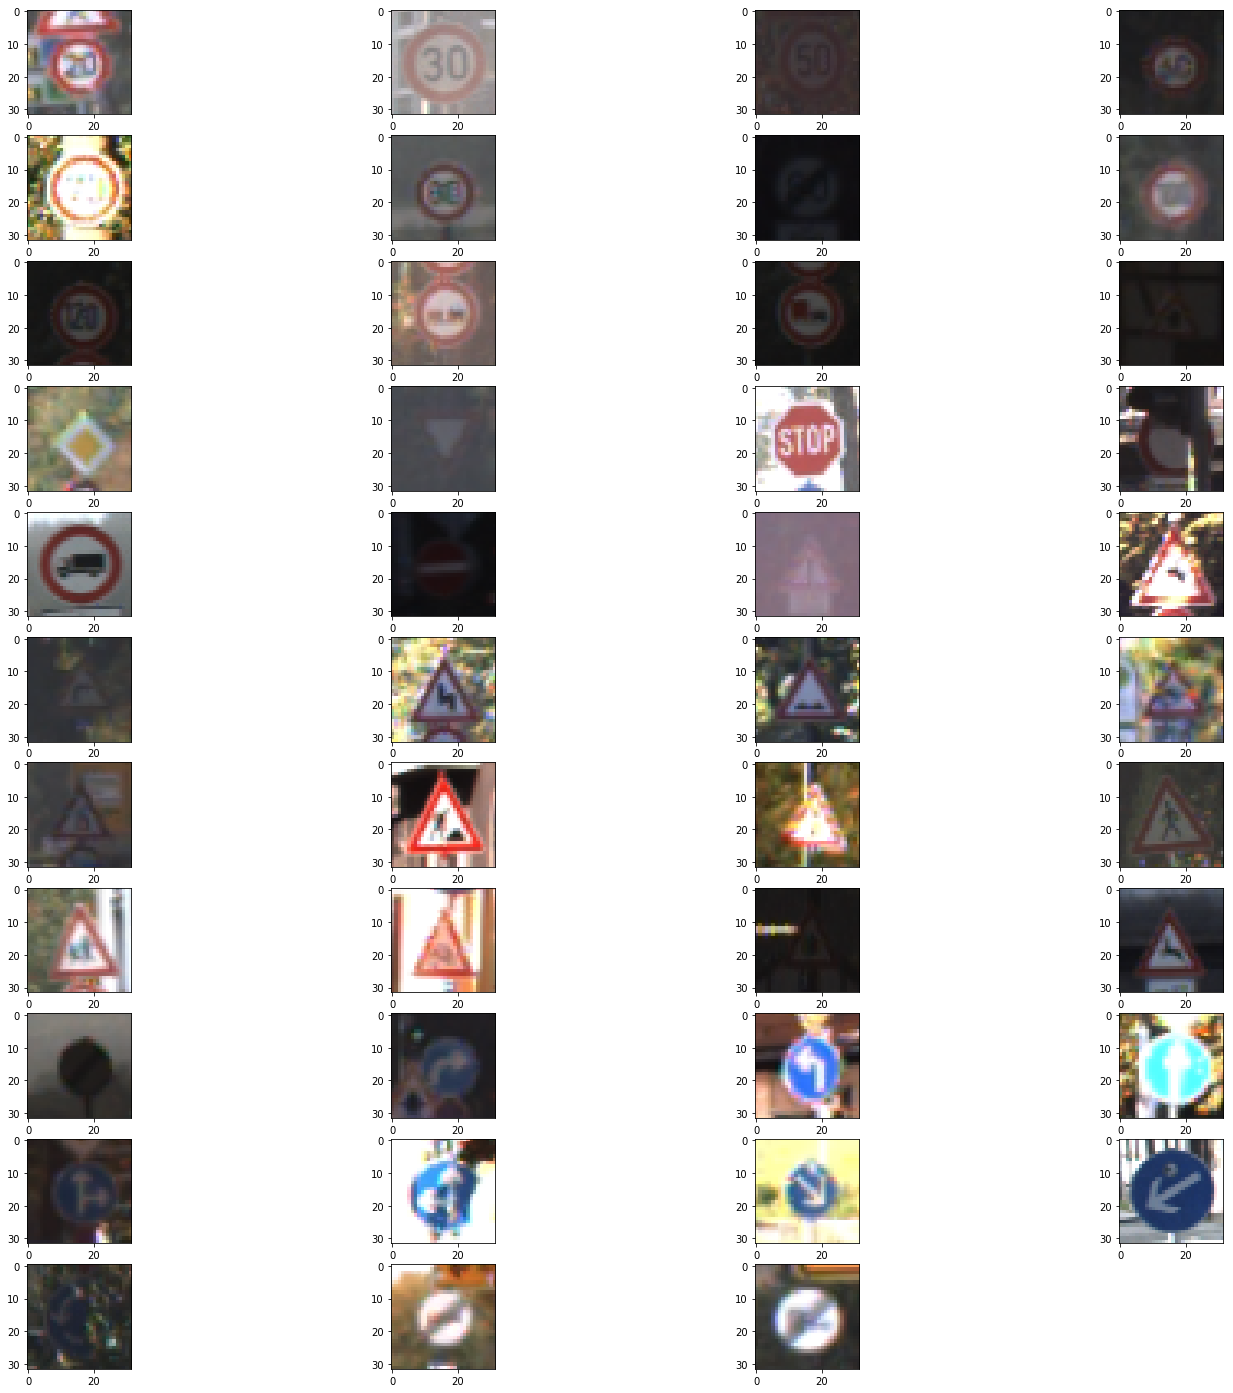

In [5]:
## IMAGES IN ALL DIFFERENT CLASSES ###
somesamples = []
for i in pos:
    image = X_train[i].squeeze()
    somesamples.append(image)
fig = plt.figure(figsize = (25,25))

for n,fimage in enumerate(somesamples):
    fig.add_subplot(len(somesamples)/4+1,4,n+1)
    plt.imshow(fimage)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### HELPER ###
import math
import cv2
#Convert to grayscale
def grayscale(image): 
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Convert to YUV
def rgb2yuv(image):
    return cv2.cvtColor(image.astype(np.uint8),cv2.COLOR_RGB2YUV)
#Histogram Equalization
def histogramEqualize(image): 
    return  cv2.equalizeHist(image)
#Normalize to 0-1 range
def normalize(image_data): 
    norm = image_data/255
    return norm

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
docker_size_limit = 70000
X_train, y_train = resample(X_train, y_train, n_samples=docker_size_limit)

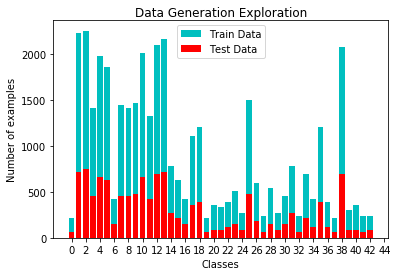

In [8]:
## Data exploration visualization goes here.
## Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.bar(train_class,train_class_samples,label='Train Data',color='c')
plt.bar(test_class,test_class_samples,label='Test Data',color='r')
plt.xticks(range(0,45,2))
plt.xlabel('Classes')
plt.ylabel('Number of examples')
plt.legend()
plt.title('Data Generation Exploration')
plt.show()

In [9]:
# ###NORMALIZE IMAGES##
X_train = normalize(X_train)
X_test = normalize(X_test)

In [10]:
##Split training and validation 
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=0.20,
    random_state=42)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
- From the general given data, the test data is 32% of total training data (before taking any data out for validation). I'm not confident that the training data is sufficient to train for the test. From "Traffic Sign Recognition with Multi-Scale Convolutional Networks" paper, jittered data proved to lower the validation error. Hence, I choose to generate 70000 data from the original train data set. From there, I split 20% of training data for validation. The test size is now 22% of the training size which I feel more confident to train.
- To lower the data closer to zero center, I scaled [0-255] pixels to [0-1] range for all image channels.

In [11]:
# ###### SAVING DATA #########
# import pickle
# import os
# pickle_file = 'trafficSign.pickle'
# if not os.path.isfile(pickle_file):
#     print('Saving data to pickle file...')
#     try:
#         with open('trafficSign.pickle', 'wb') as pfile:
#             pickle.dump(
#                 {
#                     'train_dataset': X_train,
#                     'train_labels': y_train,
#                     'valid_dataset': X_valid,
#                     'valid_labels': y_valid,
#                     'test_dataset': X_test,
#                     'test_labels': y_test,
#                 },
#                 pfile, pickle.HIGHEST_PROTOCOL)
#     except Exception as e:
#         print('Unable to save data to', pickle_file, ':', e)
#         raise

# print('Data cached in pickle file.')

In [12]:
# ###### CHECK POINT ##########
# %matplotlib inline

# # Load the modules
# import pickle
# import math

# import numpy as np
# import tensorflow as tf
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# # Reload the data
# pickle_file = 'trafficSign.pickle'
# with open(pickle_file, 'rb') as f:
#   pickle_data = pickle.load(f)
#   X_train = pickle_data['train_dataset']
#   y_train = pickle_data['train_labels']
#   X_valid = pickle_data['valid_dataset']
#   y_valid = pickle_data['valid_labels']
#   X_test = pickle_data['test_dataset']
#   y_test = pickle_data['test_labels']
#   del pickle_data  # Free up memory


# print('Data and modules loaded.')

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
- I generate resample the training data up to 70000 and use 20% of the new generated data for validation. Before training, training data will be shuffled. Testing data is the same as given. Increasing extra data is for the quality of the training, to get the higher optimization. For the provided set of data, the number of testing samples is 32% the number of training samples. As previously comment, increasing the data for training set is to increase the confidence of training process.
- By plotting the new generated data, the plot pattern was not so much different from the original data but higher sample quanity. 

In [13]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
###Most architecture code, training and evaluation code below are built based on reference of LeNet Lab Lectures#
from tensorflow.contrib.layers import flatten
n_classes = 43
dropout = 0.5
def conv2d(x, W, b, strides = 1):
    x = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding='VALID')
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1,k,k,1],strides=[1,k,k,1],padding='VALID')

def ConvNet(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1': 8,
        'layer_2': 18,
        'fully_connected_3': 150,
        'fully_connected_4': 86
    }
    weight = {
        'layer_1': tf.Variable(tf.truncated_normal(shape=[5,5,3,layer_depth['layer_1']],mean=mu, stddev=sigma)),
        'layer_2': tf.Variable(tf.truncated_normal(shape=[5,5,layer_depth['layer_1'],layer_depth['layer_2']], 
                                                   mean=mu, stddev=sigma)),
        'fully_connected_3': tf.Variable(tf.truncated_normal(shape=[450,layer_depth['fully_connected_3']],
                                                             mean=mu, stddev=sigma)),
        'fully_connected_4': tf.Variable(tf.truncated_normal(shape=[layer_depth['fully_connected_3'],layer_depth['fully_connected_4']],
                                                             mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal(shape=[layer_depth['fully_connected_4'],n_classes],mean=mu,stddev=sigma))
        }
    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
        'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
        'fully_connected_3': tf.Variable(tf.zeros(layer_depth['fully_connected_3'])),
        'fully_connected_4': tf.Variable(tf.zeros(layer_depth['fully_connected_4'])),
        'out': tf.Variable(tf.zeros(n_classes))
        }
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x8.
    # Relu Activation.
    # Maximum Pooling. Input = 28x28x8. Output = 14x14x8.
    conv1 = conv2d(x,weight['layer_1'],biases['layer_1'])
    conv1 = maxpool2d(conv1)

    # Layer 2: Convolutional.Input = 14x14x8 Output = 10x10x18.
    # Relu Activation.
    # Maximum Pooling. Input = 10x10x18. Output = 5x5x18.
    conv2 = conv2d(conv1,weight['layer_2'],biases['layer_2'])
    conv2 = maxpool2d(conv2)
    # Flatten. Input = 5x5x18. Output = 450.
    conv2 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 450. Output = 150.
    # Activation. ReLu. Drop-out
    fc3 = tf.add(tf.matmul(conv2,weight['fully_connected_3']),biases['fully_connected_3'])
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob)
    

    # Layer 4: Fully Connected. Input = 150. Output = 86.
    # Activation.
    fc4 = tf.add(tf.matmul(fc3,weight['fully_connected_4']),biases['fully_connected_4'])
    fc4 = tf.nn.relu(fc4)
    fc4 = tf.nn.dropout(fc4, keep_prob)

    # Layer 5: Fully Connected. Input = 86. Output = 43.
    logits = tf.add(tf.matmul(fc4,weight['out']),biases['out'])
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
- The first phrase includes convolution, ReLu activation and maximum pooling:
    - First convolution layer transform data 32x32x3 to 28x28x8 by using 8 filters 5x5 size with Valid padding and 1 stride. After that, ReLu activation set all the values less than 0 to 0.
    - Maximum Pooling layer using Valid padding and 2 strides will then choose the maximum value in each patch it passes and finally decrease the size from previous layer into half which is 14x14x8.
    - Second convolution layer repeats the same method as the first but with 18 filters. The final size in this layer becomes 10x10x18.
    - Once again, Maximum Pooling is as well repeated in this layer with the same method as the first pooling, hence the size becomes 5x5x18.
 
To avoid overfitting data, I choose to apply ReLu and drop-out at Fully Connected layers.
- The second phrase after convolution is fully connected, ReLu and Drop-out:
    - 5x5x18 input data from previous layer is flatten into 1D data with 450 values.
    - With the flatten data, I can start apply Linear Regression (xW + b). The first fully connected layer transform 450 input values into 150 values using 450x150 weights and 1x150 biases. Next, ReLu is applied. Next, 50% drop out is applied.
    - The second fully connected layer transforms 150 values into 86 values using 150x86 weights and 1x86 biases. Similar to previous layer, ReLu and 50% drop-out are also subsequently applied.
    - Lastly, the out layer returns the final logits/scores of 43 classes using 86x43 weights and 43 biases.

In [15]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [16]:
epochs = 20
batch_size = 128
rate = 0.001
logits = ConvNet(x, keep_prob)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.AdamOptimizer(learning_rate = rate).minimize(loss)

In [17]:
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#REFERENCE CODE FROM LENET LAB
def evaluate(train, labels):
    sess = tf.get_default_session()
    total_accuracy = 0
    for start in range(0,len(train),batch_size):
        stop = start + batch_size
        batch_x, batch_y = train[start:stop], labels[start:stop]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y:batch_y, keep_prob: 1})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy/len(train)

In [18]:
### Train your model here.
### Feel free to use as many code cells as needed.
save_file = './model.ckpt'
saver = tf.train.Saver()

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    n_train = len(X_train)
    
    print ("Training...")
    print ()
    for i in range(epochs):
        for start in range(0, n_train, batch_size):
            end = start + batch_size
            batch_x, batch_y = X_train[start:end], y_train[start:end]
            sess.run(optimizer, feed_dict = {x: batch_x, y: batch_y, keep_prob: dropout})
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ....".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print('Training is finished. Data is safely saved.')

Training...

EPOCH 1 ....
Validation Accuracy = 0.795

EPOCH 2 ....
Validation Accuracy = 0.911

EPOCH 3 ....
Validation Accuracy = 0.956

EPOCH 4 ....
Validation Accuracy = 0.970

EPOCH 5 ....
Validation Accuracy = 0.980

EPOCH 6 ....
Validation Accuracy = 0.987

EPOCH 7 ....
Validation Accuracy = 0.988

EPOCH 8 ....
Validation Accuracy = 0.990

EPOCH 9 ....
Validation Accuracy = 0.994

EPOCH 10 ....
Validation Accuracy = 0.994

EPOCH 11 ....
Validation Accuracy = 0.993

EPOCH 12 ....
Validation Accuracy = 0.994

EPOCH 13 ....
Validation Accuracy = 0.995

EPOCH 14 ....
Validation Accuracy = 0.995

EPOCH 15 ....
Validation Accuracy = 0.996

EPOCH 16 ....
Validation Accuracy = 0.996

EPOCH 17 ....
Validation Accuracy = 0.996

EPOCH 18 ....
Validation Accuracy = 0.997

EPOCH 19 ....
Validation Accuracy = 0.997

EPOCH 20 ....
Validation Accuracy = 0.997

Training is finished. Data is safely saved.


In [19]:
###Evalue Model##
save_file = './model.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.944


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
- I used same optimizer as in LeNet lab, Adam Optimizer. Batch size is 128, 20 epochs and learning rate is 0.001. Hyperparameters are: 0 for mean and 0.1 for standard deviation. The training drop-out rate is 0.5, and the rate is changed to 1 for evaluation. The model achieved maximum validation accuracy with 99.7% at epoch 18 and remain same validation accuracy with the last 2 epochs. The final accuracy on the test set is 94.4% which is good in my opinion.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
- It was aimed to be trial and error by appling similar working model and hyperparameters from LeNet lab. The first trial's result was good in my opinion, with final validation accuracy was 98.8%. However, the first trial was applied without drop-out or ReLu at fully connected layer. To avoid overfitting, I decided to apply ReLu, Dropout in 2 Fully-Connected layers and increase from 10 epochs to 20 epochs training. The validation accuracy was around 97% with 50% drop out at evaluation, which is actually less than the first trial.
- Finally, I changed keep probability to 100% at evaluation, the result improves from 97% to 99.7% validation accuracy. Here, I stopped the training.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

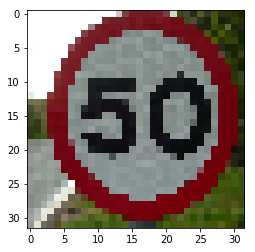

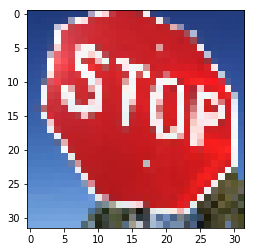

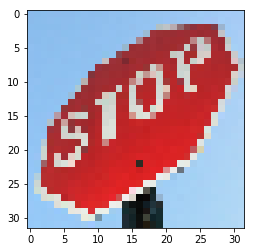

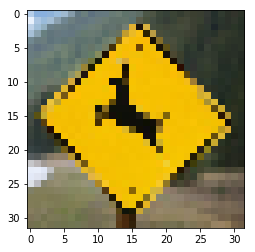

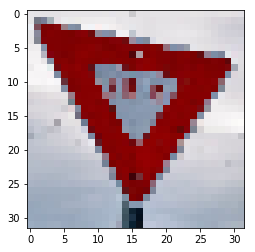

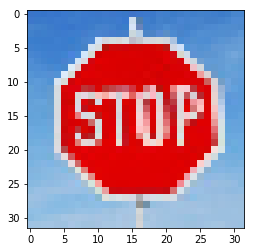

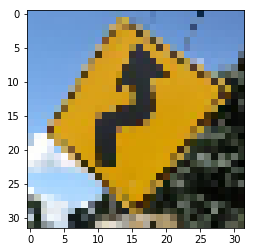

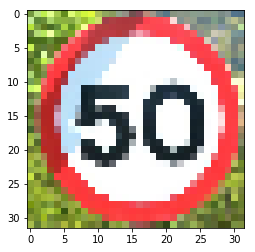

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

test_images = []
test_labels = [2,14,14,31,13,14,21,2]
z = os.listdir('test images/')
for i in range(1,9):
    image = cv2.resize(mpimg.imread('test images/'+str(i)+'.jpg'),(32,32))
    test_images.append(image)
    plt.imshow(image)
    plt.show()

images = normalize(np.array(test_images).astype(float))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I obtained 8 images from google images and cropped the images to target more of the signs:
- (2) 50 km/h limit sign: one sign has significantly larger size than the other.
- (1) yield sign.
- (3) stop signs with different angle rotations and transformations.
- (1) double curve sign, U.S sign.
- (1) wild animal sign (deer), U.S sign.

These signs are are mostly U.S signs. Some signs are similiar to German signs but some may be not. All sizes are resized to 32x32x3 before test. I can tell the larger size of the image make it harder to recognize by normal eyes when resize to smaller size. Hence, I think that could be a quality that makes classification difficult. The angle of the images and lighting in the images are two other qualities.

In [21]:
import csv
labels = []
description = []
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        labels.append(row[0])
        description.append(row[1])
    labels.remove(labels[0])
    description.remove(description[0])

In [24]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
###Evalue Model##
save_file = './model.ckpt'
saver = tf.train.Saver()
prediction = tf.argmax(logits, 1)
with tf.Session() as sess:
    saver.restore(sess, save_file)
    test_scores = sess.run(logits, feed_dict = {x: images, keep_prob: dropout})
    pred = sess.run(prediction, feed_dict={x: images, keep_prob: 1})
    for i in pred:
        print ('Image prediction is: '+ str(i) + ' - ' + description[i])
    test_accuracy = evaluate(images, test_labels)
    print("Test Accuracy = {:.0f} %".format(test_accuracy*100))

Image prediction is: 1 - Speed limit (30km/h)
Image prediction is: 14 - Stop
Image prediction is: 12 - Priority road
Image prediction is: 11 - Right-of-way at the next intersection
Image prediction is: 13 - Yield
Image prediction is: 14 - Stop
Image prediction is: 14 - Stop
Image prediction is: 2 - Speed limit (50km/h)
Test Accuracy = 50 %


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The test accuracy is 50% out of 8 images. But the number aren't exceeded anywhere close to the 94.4% testing accuracy on given data set. This could happen for two reasons: I intentionally picked signs shapes that are not similar with German signs, and the new image test quanity is a lot smaller than given test data. Hence, the total accuracy rate is expected to be lower.

In [25]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
logits = tf.placeholder('float', [None, 43])
probability = tf.nn.softmax(logits)
topK_values, topK_indices = tf.nn.top_k(probability, k = 5)
labels = np.unique(test_labels)

with tf.Session() as sess:
    top5_vals, top5_indx = sess.run([topK_values, topK_indices], feed_dict = {logits: test_scores})

In [26]:
labels_dict = ['Speed Limit (50km/h)','Stop','Stop', 'Wild animal', 'Yield', 'Stop','Double Curves','Speed Limit (50km/h)']

def certainty_test(i, topK_vals, topK_indx):
    print ('Visualize certainty for ' + labels_dict[i])
    plt.imshow(test_images[i])
    plt.show

    for a in range(5):
        print (description[topK_indx[a]] + ' : ' + str(topK_vals[a]*100) +'%')

Visualize certainty for Speed Limit (50km/h)
Speed limit (30km/h) : 57.8921377659%
Roundabout mandatory : 34.7829669714%
Speed limit (50km/h) : 7.31972455978%
Speed limit (100km/h) : 0.00219937519432%
Dangerous curve to the left : 0.00196575110749%


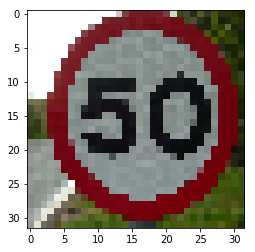

In [27]:
i = 0
certainty_test(i,top5_vals[i],top5_indx[i])

Visualize certainty for Stop
Stop : 100.0%
Speed limit (80km/h) : 1.4337345533e-06%
No entry : 8.79355865901e-08%
Road work : 2.61602822738e-08%
Speed limit (60km/h) : 4.93668994572e-09%


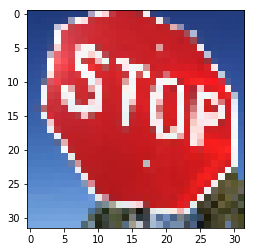

In [28]:
i = 1
certainty_test(i,top5_vals[i],top5_indx[i])

Visualize certainty for Stop
No entry : 99.5734393597%
Stop : 0.198576413095%
Traffic signals : 0.127704255283%
Bicycles crossing : 0.0621881277766%
Priority road : 0.0257299776422%


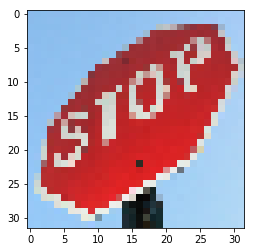

In [29]:
i = 2
certainty_test(i,top5_vals[i],top5_indx[i])

Visualize certainty for Wild animal
Right-of-way at the next intersection : 50.712454319%
End of no passing : 19.1809073091%
End of no passing by vechiles over 3.5 metric tons : 16.2759155035%
Slippery road : 11.6132006049%
Roundabout mandatory : 0.844018999487%


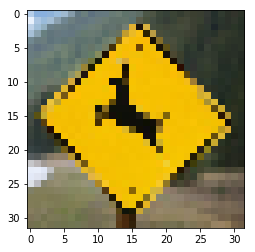

In [30]:
i = 3
certainty_test(i,top5_vals[i],top5_indx[i])

Visualize certainty for Yield
Yield : 100.0%
Road work : 2.26658292671e-32%
Speed limit (20km/h) : 0.0%
Speed limit (30km/h) : 0.0%
Speed limit (50km/h) : 0.0%


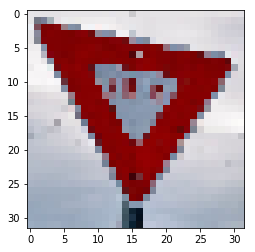

In [31]:
i = 4
certainty_test(i,top5_vals[i],top5_indx[i])

Visualize certainty for Stop
Stop : 100.0%
No entry : 9.18641118036e-10%
Speed limit (120km/h) : 1.60318573559e-20%
Speed limit (70km/h) : 6.39232734836e-21%
Speed limit (20km/h) : 1.26623552141e-23%


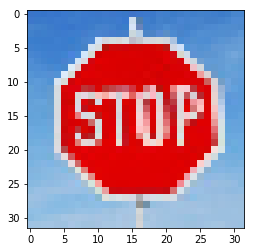

In [32]:
i = 5
certainty_test(i,top5_vals[i],top5_indx[i])

Visualize certainty for Double Curves
No vechiles : 63.8080596924%
Yield : 12.0844356716%
Speed limit (80km/h) : 11.7322653532%
Stop : 6.3166514039%
Road work : 1.68213751167%


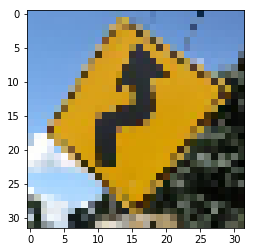

In [33]:
i = 6
certainty_test(i,top5_vals[i],top5_indx[i])

Visualize certainty for Speed Limit (50km/h)
Speed limit (50km/h) : 100.0%
Speed limit (30km/h) : 2.44327023891e-09%
Speed limit (60km/h) : 1.41297030296e-12%
Road work : 5.00586090711e-16%
Yield : 7.80575240589e-17%


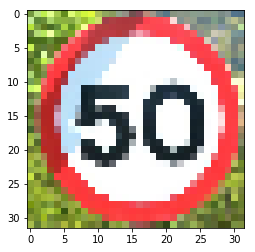

In [34]:
i = 7
certainty_test(i,top5_vals[i],top5_indx[i])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
- First SPEED LIMIT 50km/h: uncertain. Appear in top 5
- Second STOP: certain.
- Third STOP: uncertain. Appear in top 5
- Fourth Wild Animal: uncertain. Does not appear in top 5
- Fifth YIELD: very certain. 100%
- Sixth STOP: very certain. 100%
- Seventh DOUBLE CURVES: uncertain. Does not appear in top 5
- Eight SPEED LIMIT 50km/h: certain

From 8 testing samples, I can conclude that the model is very certain with signs are similar to the German sign data (yield, stop, 50 km/h). Brightness of the sign and original size prior to resizing plays a good part in sign predicting as well. For example, the first 50 km/h has lower brightness and bigger size prior to resizing compare to the 2nd 50km/h sign. I think it was the reason that the first sign wasn't predicted correctly but it was in top 5 list.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.